# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [ ]:
boston = pd.read_csv('/content/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### Data understanding


```

CRIM    : Tingkat kriminalitas per kapita di wilayah tersebut
ZN      : Proporsi lahan perumahan yang diatur untuk zona dengan luas lebih dari 25.000 sq.ft
INDUS   : Proporsi bisnis non-retail (industri) per town (kota/wilayah)
CHAS    : Variabel dummy (kategorikal biner): 1 jika wilayah berbatasan dengan Sungai Charles; 0 jika tidak
NOX     : Konsentrasi nitric oxides (oksida nitrat) (bagian per 10 juta). Ini adalah ukuran polusi udara
RM      : Jumlah rata-rata kamar per hunian di wilayah tersebut
AGE     : Proporsi unit yang dibangun sebelum tahun 1940 (unit tua) yang ditempati oleh pemilik
DIS     : Jarak tertimbang ke lima pusat pekerjaan utama di Boston
RAD     : Indeks aksesibilitas ke jalan raya radial (jalan raya utama)
TAX     : Tingkat pajak properti dengan nilai penuh per $10.000
PTRATIO : Rasio siswa-guru (pupil-teacher ratio) per wilayah
Black   : Dihitung dari 1000(Bk​−0.63)2, di mana Bk​ adalah proporsi penduduk keturunan Afrika-Amerika per wilayah
LSTAT   : Persentase status populasi berstatus lebih rendah (lower status population)
MEDV    : Nilai rata-rata rumah yang ditempati oleh pemilik dalam satuan $1000. Ini adalah Variabel Dependen (Y) yang ingin diprediksi
```


## Split data

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = boston.drop(columns='medv')
target = boston[['medv']]

# X = boston.drop(columns='medv')
# y = boston[['medv']]

feature_boston_train, feature_boston_test, target_boston_train, target_boston_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
feature.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14


In [ ]:
target.head(2)

,medv
0,24.0
1,21.6


In [ ]:
feature_boston_train.shape, feature_boston_test.shape

((404, 13), (102, 13))

In [ ]:
target_boston_train.shape, target_boston_test.shape

((404, 1), (102, 1))

### Calculate VIF scores

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.713187
2,zn,2.465631
3,indus,3.877855
4,chas,1.096674
5,nox,4.469150
6,rm,1.947809
7,age,2.989948
8,dis,4.168578
9,rad,7.658316
10,tax,8.943301


interpretasi:

Ada beberapa fitur dengan skor VIF tinggi / hubungan kuat antar sesama fitur (> 4):
- nox (polusi udara) = 4.46
- dis (jarak ke pusat pekerjaan) = 4.16
- rad (akses ke jalan raya utama) = 7.65
- tax (tingkat pajak properti) = 8.94

### heatmap correlation

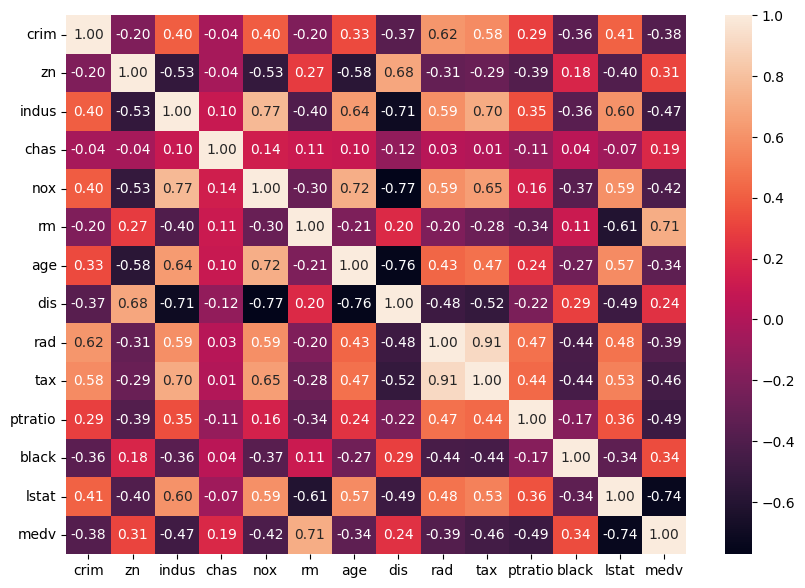

In [ ]:
# heatmap correlation
boston_train = pd.concat([feature_boston_train, target_boston_train], axis=1)
corr = boston_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

***rad & tax = 0.91***

korelasi dengan target (medv)
1. rad & medv = -0.39
2. ***tax & medv = -0.46***

tax merupakan variabel independen (X) yang akan dipertahankan untuk model ML karena nilainya lebih tinggi korelasinya dengan variabel dependen (y) medv

korelasi negatif linear jika tax tinggi maka harga rata-rata rumah cenderung lebih murah.

memilih untuk mempertahankan tax, dan menghapus fitur lainnya.

VIF score:
- nox 4.46
- dis 4.16
- rad 7.65
- ***tax 8.94***

### Drop multicollinearity

In [ ]:
feature_boston_train.shape, feature_boston_test.shape

((404, 13), (102, 13))

In [ ]:
# drop redundant features
feature_boston_train = feature_boston_train.drop(columns=['nox','dis','rad'])
feature_boston_test = feature_boston_test.drop(columns=['nox','dis','rad'])

In [ ]:
feature_boston_train.shape, feature_boston_test.shape

((404, 10), (102, 10))

### Recheck VIF

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.576797
2,zn,1.862308
3,indus,3.175204
4,chas,1.072548
5,rm,1.855735
6,age,2.341920
7,tax,2.958826
8,ptratio,1.502214
9,black,1.313018
10,lstat,2.761524


### Check gap train & test

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(feature_boston_train, target_boston_train)

In [ ]:
y_pred_train = model.predict(feature_boston_train)
y_pred_test = model.predict(feature_boston_test)

In [ ]:
from sklearn.metrics import r2_score


print('R-squared for training data is {}'.format(r2_score(target_boston_train, y_pred_train)*100))
print('R-squared for testing data is {}'.format(r2_score(target_boston_test, y_pred_test)*100))

R-squared for training data is 71.49637813148956
R-squared for testing data is 59.302291224483994


In [ ]:
r2_score_train = r2_score(target_boston_train, y_pred_train)*100
r2_score_test = r2_score(target_boston_test, y_pred_test)*100

r2_score_train - r2_score_test

12.19408690700557

nilai R2 score selisih antara data train dan test 12.19% indikasi overfitting (train bagus, test jelek)
- R-squared for training data is 71.49%
- R-squared for testing data is 59.30%

# Model Training

## Ridge

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

# define the model
ridge_reg = Ridge(alpha=0.1,
                  random_state=42)

ridge_reg.fit(X_boston_train, y_boston_train)

Ridge(alpha=0.1, random_state=42)

In [ ]:
# retrieve the coefficients

data = feature_boston_train
model = ridge_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,6.795462
1,crim,-0.058799
2,zn,-0.014025
3,indus,0.018389
4,chas,3.039253
5,rm,5.098972
6,age,0.010021
7,tax,-0.000189
8,ptratio,-0.807435
9,black,0.012382


## Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# define the model
lasso_reg = Lasso(alpha=0.1,
                  random_state=42)

lasso_reg.fit(X_boston_train, y_boston_train)

Lasso(alpha=0.1, random_state=42)

In [ ]:
# retrieve the coefficients

data = feature_boston_train
model = lasso_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,8.862387
1,crim,-0.059013
2,zn,-0.012827
3,indus,0.017525
4,chas,1.537956
5,rm,4.816993
6,age,0.014206
7,tax,-0.000102
8,ptratio,-0.816959
9,black,0.012380


# Manual choosing the best lambda

## Split data: train-validation-test

In [ ]:
# val -> mencari best model, based on parameter

# split train test
from sklearn.model_selection import train_test_split

feature = boston.drop(columns='medv')
target = boston[['medv']]

# First splitting: pretrain and test
feature_boston_pretrain, feature_boston_test, target_boston_pretrain, target_boston_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_boston_train, feature_boston_validation, target_boston_train, target_boston_validation = train_test_split(feature_boston_pretrain, target_boston_pretrain, test_size=0.20, random_state=42)

## Drop Multicollinear Features

In [ ]:
feature_boston_train = feature_boston_train.drop(columns=['nox','dis','rad'])
feature_boston_validation = feature_boston_validation.drop(columns=['nox','dis','rad'])
feature_boston_test = feature_boston_test.drop(columns=['nox','dis','rad'])

# Ridge

## Train Multiple Models
with different alpha (lambda)

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_boston_train, y_boston_train)
ridge_reg_pointone.fit(X_boston_train, y_boston_train)
ridge_reg_one.fit(X_boston_train, y_boston_train)
ridge_reg_ten.fit(X_boston_train, y_boston_train)

Ridge(alpha=10, random_state=42)

## Find the best model (alpha)
Based on validation set

In [ ]:
from sklearn.metrics import mean_squared_error

X_boston_validation = feature_boston_validation.to_numpy()
y_boston_validation = target_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape(len(y_boston_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_boston_validation)
    rmse = np.sqrt(mean_squared_error(y_boston_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 5.100886202642037
RMSE of Ridge regression model with alpha = 0.1 is 5.100288438419682
RMSE of Ridge regression model with alpha = 1.0 is 5.094521787042945
RMSE of Ridge regression model with alpha = 10 is 5.05166207510316


***alpha = 10 adalah yang terkecil, nilai alpha tersebut yang  digunakan pada perhitungan alpha di ridge regression***

### Coefficients

In [ ]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,7.068423
1,crim,-0.052216
2,zn,-0.007855
3,indus,0.034094
4,chas,2.061822
5,rm,5.041802
6,age,0.020313
7,tax,-0.000312
8,ptratio,-0.845843
9,black,0.012919


# Lasso

## Train Multiple Models

In [ ]:
from sklearn.linear_model import Lasso

# train the model
X_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

# define the model
# 4 models with 4 different alphas (lambda)

# fit the model (training)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

lasso_reg_pointzeroone.fit(X_boston_train, y_boston_train)
lasso_reg_pointone.fit(X_boston_train, y_boston_train)
lasso_reg_one.fit(X_boston_train, y_boston_train)
lasso_reg_ten.fit(X_boston_train, y_boston_train)

Lasso(alpha=10, random_state=42)

## Find the best model (alpha)
Based on validation set

In [ ]:
from sklearn.metrics import mean_squared_error

X_boston_validation = feature_boston_validation.to_numpy()
y_boston_validation = target_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape(len(y_boston_validation),)

alphas = [0.01, 0.1, 1.0, 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_boston_validation)
    rmse = np.sqrt(mean_squared_error(y_boston_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 5.097514590498467
RMSE of Lasso regression model with alpha = 0.1 is 5.08016984806439
RMSE of Lasso regression model with alpha = 1.0 is 4.988309999786157
RMSE of Lasso regression model with alpha = 10 is 5.426622694252769


***alpha = 1.0 adalah yang terkecil, nilai alpha tersebut yang  digunakan pada perhitungan alpha di lasso regression***

### Coefficients

In [ ]:
# coeffs
lasso_best = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.945673
1,crim,-0.034953
2,zn,0.001941
3,indus,-0.000000
4,chas,0.000000
5,rm,2.572882
6,age,0.041419
7,tax,-0.001003
8,ptratio,-0.757735
9,black,0.011371


# Diagnostic

### ridge

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_boston_train)

X_boston_test = feature_boston_test.to_numpy()
y_boston_test = target_boston_test.to_numpy()

y_predict_test = ridge_best.predict(X_boston_test)

print('R-squared for training data is {}'.format(r2_score(y_boston_train, y_predict_train)*100))
print('R-squared for testing data is {}'.format(r2_score(y_boston_test, y_predict_test)*100))

R-squared for training data is 72.79488107440679
R-squared for testing data is 59.545301524387426


In [ ]:
72.79 - 59.54

13.250000000000007

masih overfitting

nilai R2 score selisih antara data train dan test 13.25% indikasi overfitting (train bagus, test jelek)
- R-squared for training data is 72.79%
- R-squared for testing data is 59.54%

### Lasso

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_boston_train)

X_boston_test = feature_boston_test.to_numpy()
y_boston_test = target_boston_test.to_numpy()

y_predict_test = lasso_best.predict(X_boston_test)

print('R-squared for training data is {}'.format(r2_score(y_boston_train, y_predict_train)*100))
print('R-squared for testing data is {}'.format(r2_score(y_boston_test, y_predict_test)*100))

R-squared for training data is 69.08222586747164
R-squared for testing data is 61.46919073977962


In [ ]:
69.08 - 61.46

7.619999999999997

### Interpretasi : model terbaik yang akan di pilih adalah Lasso Regression

Lasso R2 Score selisishnya kecil 7.6% (mengatasi overfitting)

akurasi pada data test 61.46%

- R-squared for training data is 69.08%
- R-squared for testing data is 61.46%


***model Lasso yang akan dipilih untuk model machine learning***

### check assumptions

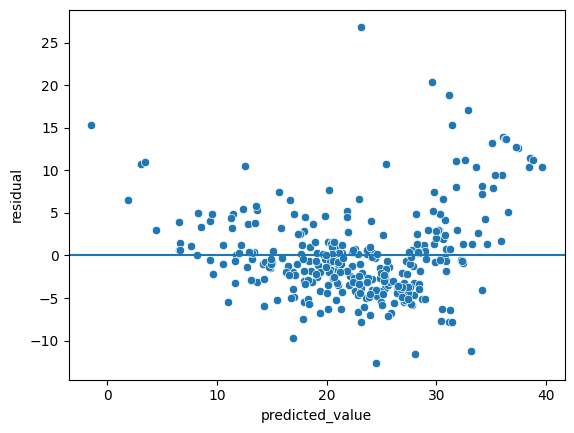

In [ ]:
# calculate residuals
residual = y_boston_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

interpretasi:

1. Linear relationship: OK. Garis horizontal y=0 cukup merepresentasikan keseluruhan titik residual.
2. ***heteroskedastisitas***: pola menunjukan agak mengerucut ke kanan bawah
3. Variance stable: NO. Variasinya itu dari lebar (di bagian kiri) ke kecil (di bagian tengah) dan melebar kembali (di bagian kanan)

/tmp/ipython-input-1108040850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: ylabel='Density'>

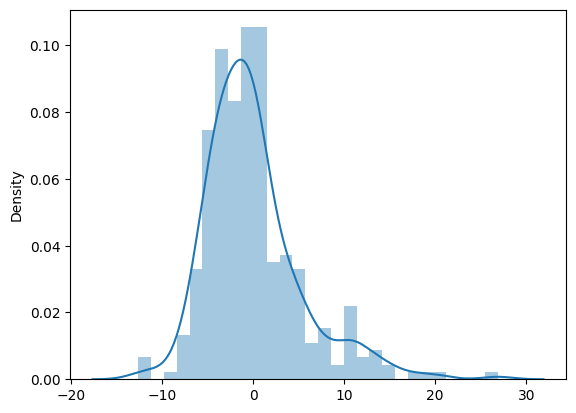

In [ ]:
sns.distplot(residual)

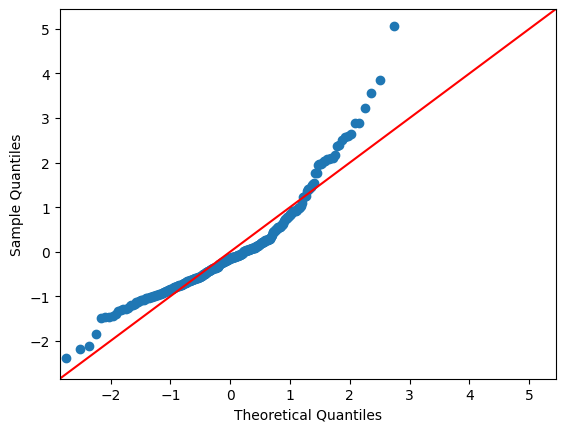

In [ ]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

interpretasi:

asumsi kenormalan residual tidak normal secara sempurna, ada beberapa outlier positif (di ekor kanan) dan beberapa outlier negatif (di ekor kiri)

# Model Evaluation (Lasso Regression)

### Training Error

In [ ]:
# prepare prediction result on train data
y_predict_train = lasso_best.predict(X_boston_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_boston_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_boston_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_boston_train, y_predict_train)*100))

RMSE for training data is 5.299257784164325
MAE for training data is 3.815568478973893
MAPE for training data is 18.015928311790002


### Testing Error

In [ ]:
# prepare prediction result on test data
X_boston_test = feature_boston_test.to_numpy()
y_predict_test = lasso_best.predict(X_boston_test)

# ground truth target
y_boston_test = target_boston_test.to_numpy()
y_boston_test = y_boston_test.reshape(len(y_boston_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_boston_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_boston_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_boston_test, y_predict_test)*100))

RMSE for testing data is 5.315646725734099
MAE for testing data is 3.535684907677296
MAPE for testing data is 18.439385451147544


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_error(y_boston_test, y_predict_test)
mean_absolute_percentage_error(y_boston_test, y_predict_test)

0.18439385451147544

# Interpretasi (kesimpulan akhir)

model Lasso regression siap digunakan untuk meprediksi harga rumah pada data baru



- ***Lasso Regression*** ini menunjukan perbaikan signifikan dalam hal penanganan overfitting dibandingkan hasil ***Ridge regresi***.
- R2 score atau akurasi data test 61.46%
- MAE rata-rata error data test 3.53%
- dan metrik rata-rata error (RMSE dan MAE) yang hampir sama antara data training dan testing

